In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from src.datasets.loading import statcan, ookla

In [2]:
statcan.boundary_names()

['provinces',
 'provinces_digital',
 'federal_electoral_districts_2013_representation_order',
 'economic_regions',
 'census_divisions',
 'population_centres',
 'population_ecumene',
 'dissemination_areas',
 'dissemination_blocks',
 'census_subdivisions',
 'designated_places',
 'lakes_and_rivers_polygons']

In [3]:
# ookla.available_files()

# Plotting of Tiles + Statistics Canda 

In [4]:
speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2022)]

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [5]:
statcan.boundary('population_centres').head(3)

,PCUID,PCNAME,PCTYPE,PCPUID,PCCLASS,PRUID,PRNAME,CMAUID,CMANAME,CMATYPE,CMAPUID,geometry
0,0300,Fortune,4,100300,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,None,None,None,None,"POLYGON ((8814306.340 1975116.377, 8814294.583..."
1,0311,Gander,1,100311,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,011,Gander,D,10011,"POLYGON ((8774241.249 2203304.440, 8774340.869..."
2,0329,Grand Bank,4,100329,2,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,None,None,None,None,"POLYGON ((8817881.080 1980819.671, 8817890.063..."


In [6]:
Alberta_area = statcan.boundary('census_divisions').loc[lambda s:s.PRNAME=='Alberta'].copy()

<!-- ## economic_regions  -->

In [7]:
# economic_regions = statcan.boundary('economic_regions').sjoin(Alberta_area[['PRNAME','PCTYPE','PCCLASS','geometry']], how='inner')
# del economic_regions['index_right']
# del economic_regions['PRNAME_left']
# #economic_regions.head()
# economic_regions

In [8]:
# speeds = speed_tiles.sjoin(Alberta_area.to_crs('epsg:4326'), how='inner') #epsg:4326
# speeds.head(3)
# ax = speeds.plot(column='avg_d_kbps')
# economic_regions.to_crs('epsg:4326').boundary.plot(ax=ax, linewidth=.5)

In [9]:
# intersection= gp.overlay(economic_regions, , how='intersection')
# intersection.plot() 

## census_divs

In [10]:
#speed_tiles = ookla.canada_speed_tiles().loc[lambda s:(s.quarter==1) & (s.year==2022)]

In [11]:
Alberta_area = statcan.boundary('population_centres').loc[lambda s:s.PRNAME=='Alberta'].copy()

In [12]:
census_divs = statcan.boundary('census_divisions').sjoin(Alberta_area[['PRNAME','PCTYPE','PCCLASS','geometry']], how='inner')
del census_divs['index_right']
del census_divs['PRNAME_left']
census_divs.sample(3) 

,CDUID,CDNAME,CDTYPE,PRUID,geometry,PRNAME_right,PCTYPE,PCCLASS
35,4815,Division No. 15,CDR,48,"POLYGON ((4452472.249 2307439.651, 4453182.789...",Alberta,4,2
33,4813,Division No. 13,CDR,48,"POLYGON ((4951972.526 2335392.157, 4948856.823...",Alberta,4,2
30,4810,Division No. 10,CDR,48,"POLYGON ((4889307.549 2195049.694, 4889375.091...",Alberta,4,2


In [14]:
Alberta = statcan.boundary('provinces').loc[lambda s:s.PRNAME=='Alberta'].copy()

/opt/conda/lib/python3.10/site-packages/geopandas/tools/overlay.py:53: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PRUID_1'} in the result is deprecated and will raise a MergeError in a future version.
  dfinter = dfinter.merge(


Text(0.5, 0.98, 'Census Divisions Average Download Speeds (kbps)')

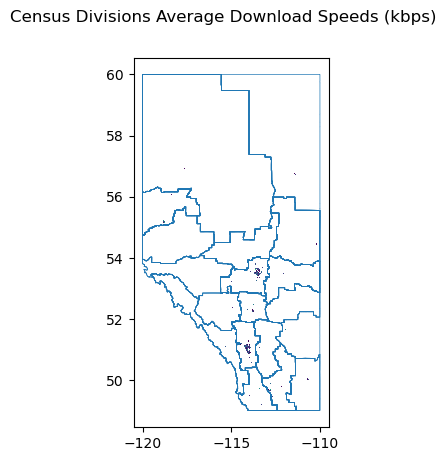

In [48]:
speeds = speed_tiles.sjoin(Alberta_area.to_crs('epsg:4326'), how='inner') #epsg:4326
speeds.head(3)
ax = speeds.plot(column='avg_d_kbps')
census_divs = census_divs.overlay(Alberta, how="intersection", keep_geom_type=False)
census_divs.to_crs('epsg:4326').boundary.plot(ax=ax, linewidth=0.5)
plt.gcf().suptitle("Census Divisions Average Download Speeds (kbps)")

In [40]:
# cliped_divs
# speeds
# census_divs

## population data

In [41]:
div_pops = statcan.census_divisions_populations()
div_pops.DAPOP = pd.to_numeric(div_pops.DAPOP, errors='coerce') #certain divisions have data flags instead of values
div_pops.head()

,CDUID,GEO_NAME,DAPOP
254,1001,Division No. 1,270345.0
72644,1002,Division No. 2,20375.0
83820,1003,Division No. 3,15560.0
92075,1004,Division No. 4,20385.0
99568,1005,Division No. 5,42015.0


Text(0.5, 0.98, 'Census Divisions Population')

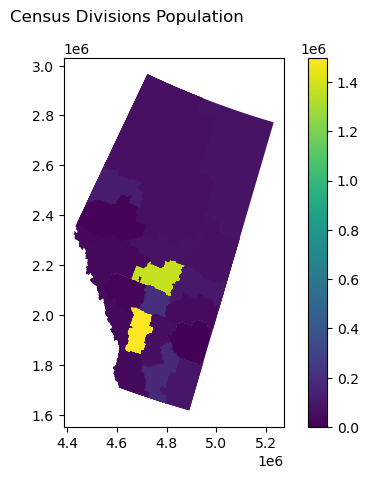

In [46]:
census_divs.CDUID = census_divs.CDUID.astype(int) ## coerce ID type to fully int instead of object
census_divs_pop = census_divs.merge(div_pops, on='CDUID').plot(column='DAPOP', vmin=0, categorical=False, legend=True) # I hav removed validate='1:1'
plt.gcf().suptitle("Census Divisions Population")

In [43]:
# # fig, ax1 = plt.subplots(figsize=(5, 3.5))
# # census_divs.merge(div_pops, on='CDUID').plot(ax=ax1, column='DAPOP', vmin=0, categorical=False, legend=True)
# ax = speeds.plot(column='avg_d_kbps')
# census_divs.merge(div_pops, on='CDUID').plot(ax=ax, column='DAPOP', vmin=0, categorical=False, legend=True)

In [ ]:
census_divs_speeds = census_divs.merge(div_pops, on='CDUID').plot(column='DAPOP', vmin=0, categorical=False, legend=True) # I hav removed validate='1:1'

## Statistics

In [44]:
# census_divs_speeds = statcan.boundary('census_divisions').to_crs('epsg:4326').sjoin(speed_tiles, how='left')

In [45]:
# divs_pops = statcan.census_divisions_populations()
# divs_pops.DAPOP = pd.to_numeric(divs_pops.DAPOP, errors='coerce') #certain subdivisions have data flags instead of values
# divs_pops

In [ ]:
# census_speeds_agg = (census_divs_speeds.groupby('CDUID')['avg_d_kbps'].mean()/1000).rename('avg_d_mpbs')

In [ ]:
# statcan.boundary('census_divisions').merge(census_speeds_agg, left_on="CDUID", right_index=True).plot(column='avg_d_mpbs', legend=True)
# plt.gcf().suptitle("Census Divisions Average Download Speeds (Mbps)")
# plt.gca().set(xlabel="Easting (m)", ylabel="Northing (m)")